In [68]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [69]:
def simulacija_kretanja_projektila(alpha, v0, k, delta_t, m, g = 9.81):
    x = 0
    y = 0
    vx = v0 * np.cos(np.radians(alpha))
    vy = v0 * np.sin(np.radians(alpha))
    ke_pocetna = 0.5 * m * v0**2

    x_lista = [x]
    y_lista = [y]
    ke_lista = [ke_pocetna]

    while y >= 0:
        vx = vx - k * vx * delta_t
        vy = vy - (g + k * vy) * delta_t
        x = x + vx * delta_t
        y = y + vy * delta_t
        ke = 0.5 * m * (vx**2 + vy**2)

        x_lista.append(x)
        y_lista.append(y)
        ke_lista.append(ke)

    return x_lista, y_lista, ke_lista

In [70]:
alpha = 45  # Ugao ispaljivanja u stepenima
v0 = 30     # Početna brzina
k = 0.1     # Koeficijent otpora vazduha
delta_t = 0.01  # Vremenski korak
m = 1.0     # Masa tela

In [71]:
x_projektila, y_projektila, ke_projektila = simulacija_kretanja_projektila(alpha, v0, k, delta_t, m)

def update(frame):
    plt.clf()
    plt.plot(x_projektila[:frame], y_projektila[:frame], label='Projektil sa otporom vazduha')
    plt.title('Simulacija kretanja projektila sa otporom vazduha')
    plt.xlabel('Distanca (m)')
    plt.ylabel('Visina (m)')
    plt.legend()
    plt.grid(True)

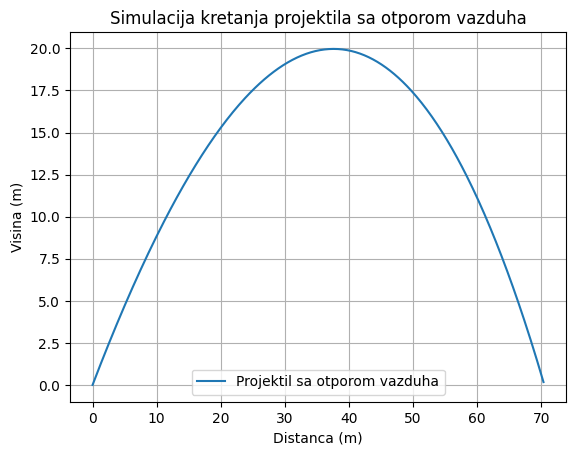

In [72]:
plt.figure()
ani = animation.FuncAnimation(plt.gcf(), update, frames=len(x_projektila), repeat=False, interval=delta_t * 10)
ani.save('animation.gif', fps=30, writer='pillow')
plt.show()


In [76]:
gubitak_energije = ke_projektila[0] - ke_projektila[-1]
print(f"Gubitak energije: {gubitak_energije} J")

Gubitak energije: 179.41036185345234 J
